## Corpus Stats

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
corpus = pd.read_csv('corpus.csv.gz', compression='gzip')

In [2]:
list(corpus.columns.values)

['Unnamed: 0',
 'id',
 'qual_a_melhor_classificao_para_esse_texto',
 'qual_a_melhor_classificao_para_esse_texto:confidence',
 'authorid',
 'blogid',
 'content',
 'contentcount',
 'date',
 'firstpart',
 'labels',
 'me',
 'polarity',
 'postid',
 'published',
 'readmore',
 'replies',
 'rownum',
 'title',
 'titlecount',
 'wpscount',
 'year']

## Contagem

In [3]:
blogs = corpus[['blogid']].groupby(['blogid'])
autores = corpus[['authorid']].groupby(['authorid'])
postagens = corpus[['postid']].groupby(['postid'])
print('Total do Corpus: %i' %len(corpus))
print('Postagens: %i' %len(postagens))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Total do Corpus: 1000
Postagens: 1000
Blogs: 972
Autores: 972


In [4]:
corpus[['postid','qual_a_melhor_classificao_para_esse_texto']].groupby(['qual_a_melhor_classificao_para_esse_texto']).agg(['count'])

,postid
,count
qual_a_melhor_classificao_para_esse_texto,
diario,634
outro,366


In [5]:
confidence = corpus[['postid','qual_a_melhor_classificao_para_esse_texto:confidence']].groupby(['qual_a_melhor_classificao_para_esse_texto:confidence']).agg(['count'])
confidence['postid'].sort_values('count',ascending=False).head(5)

,count
qual_a_melhor_classificao_para_esse_texto:confidence,
1.0000,534
0.6667,11
0.6500,7
0.6707,7
0.6557,5


## LIWC Stats

In [6]:
from liwc import LIWC
liwc_class = LIWC()

In [28]:
#mtx = liwc_class.build_features(corpus['content'])
columns = ['funct','pronoun','ppron','i','we','you','shehe','they','ipron','article','verb','auxverb','past','present','future','adverb','preps','conj','negate','quant','number','swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
#df_liwc = pd.DataFrame(mtx, columns=columns)
#df_liwc.to_csv('corpus_liwc_mtx.csv.gz', compression='gzip')
df_liwc = pd.read_csv('corpus_liwc_mtx.csv.gz', compression='gzip')
df_liwc.shape

(1000, 67)

In [29]:
df_liwc['class'] = corpus['qual_a_melhor_classificao_para_esse_texto']
#df_liwc.to_csv('corpus_liwc_mtx.csv.gz', compression='gzip')
df_liwc['confidence'] = corpus['qual_a_melhor_classificao_para_esse_texto:confidence']
df_liwc['wc'] = corpus['contentcount']
df_liwc.shape

(1000, 69)

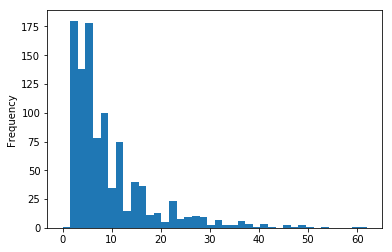

In [9]:
%matplotlib inline
df_liwc['i'].plot.hist(bins=40)

In [10]:
diario = df_liwc[df_liwc['class'] == 'diario']
outro = df_liwc[df_liwc['class'] == 'outro']

## Significance Test

In [12]:
stats = pd.DataFrame(data={'diario_mean': diario.mean(axis=0)}, index=columns)
stats['diario_std'] = diario.std(axis=0)
stats['outro_mean'] = outro.mean(axis=0)
stats['outro_std'] = outro.std(axis=0)

In [13]:
significance = []
for column in list(stats.index.values):
    a = diario[column]
    b = outro[column]
    t, p = ttest_ind(a, b, equal_var=False)
    significance.append(p)
stats['significance'] = significance

In [14]:
stats_signify = stats[stats.significance <= 0.05]
stats_signify.sort_values('significance',ascending=True)

,diario_mean,diario_std,outro_mean,outro_std,significance
you,24.984227,17.351575,33.683060,22.939064,6.072370e-10
shehe,23.246057,16.929909,30.959016,21.637638,7.419098e-09
i,10.492114,9.182412,7.661202,6.314582,1.159406e-08
nonfl,8.783912,6.730116,11.819672,8.811589,1.856881e-08
preps,51.424290,33.501382,64.909836,41.897789,1.945733e-07
they,6.481073,5.888145,8.871585,7.733394,4.123728e-07
article,28.154574,19.093056,35.508197,23.771600,5.726449e-07
work,8.996845,9.382515,12.795082,13.774866,3.514432e-06
space,36.197161,24.728426,44.469945,28.611482,4.515795e-06
relig,2.339117,3.063336,3.816940,6.015672,1.440279e-05


## Most Informative Psychological Categories

In [15]:
psychological_columns = ['swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
psychological_stats = stats_signify.ix[psychological_columns]
psychological_stats.sort_values('significance',ascending=True).head(15)

,diario_mean,diario_std,outro_mean,outro_std,significance
nonfl,8.783912,6.730116,11.819672,8.811589,1.856881e-08
work,8.996845,9.382515,12.795082,13.774866,3.514432e-06
space,36.197161,24.728426,44.469945,28.611482,4.515795e-06
relig,2.339117,3.063336,3.816940,6.015672,1.440279e-05
incl,52.332808,33.378692,62.489071,39.005214,3.355337e-05
achieve,11.230284,8.504471,13.937158,11.078494,6.077888e-05
swear,19.563091,13.400854,23.620219,16.404828,6.506922e-05
social,70.621451,46.262749,83.937158,53.930080,8.388890e-05
cogmech,143.269716,89.576596,167.158470,105.108591,2.830170e-04
cause,16.840694,11.353776,19.885246,14.556567,6.155371e-04


## Relative LIWC

In [31]:
prop_liwc = df_liwc
prop_liwc.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'funct', 'pronoun', 'ppron', 'i',
       'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verb', 'auxverb',
       'past', 'present', 'future', 'adverb', 'preps', 'conj', 'negate',
       'quant', 'number', 'swear', 'social', 'family', 'friend', 'humans',
       'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech',
       'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl',
       'excl', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health',
       'sexual', 'ingest', 'relativ', 'motion', 'space', 'time', 'work',
       'achieve', 'leisure', 'home', 'money', 'relig', 'death', 'assent',
       'nonfl', 'filler', 'class', 'confidence', 'wc'], dtype=object)

In [32]:
prop_liwc.drop(prop_liwc.columns[0], axis=1,inplace=True)
prop_liwc.drop(prop_liwc.columns[0], axis=1,inplace=True)
prop_liwc = prop_liwc[prop_liwc.wc.apply(lambda x: str(x).isnumeric())]

wc_vector = prop_liwc['wc']
class_vector = prop_liwc['class']

prop_liwc.drop('class',axis=1,inplace=True)
prop_liwc.drop('confidence',axis=1,inplace=True)
prop_liwc.drop('wc',axis=1,inplace=True)

prop_liwc.shape

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(997, 64)

In [34]:
prop_matrix = prop_liwc.as_matrix().astype(float) / wc_vector.as_matrix().astype(float)[:, np.newaxis]
prop_liwc = pd.DataFrame(prop_matrix, columns=columns)
prop_matrix.shape

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(997, 64)

## Relative Significance

In [35]:
prop_liwc['class'] = class_vector
prop_liwc['wc'] = wc_vector

In [36]:
diario = prop_liwc[prop_liwc['class'] == 'diario']
outro = prop_liwc[prop_liwc['class'] == 'outro']

In [37]:
print(diario['wc'].astype(float).mean())
print(outro['wc'].astype(float).mean())

373.418383518
458.842975207


In [38]:
relative_stats = pd.DataFrame(data={'diario_mean': diario.mean(axis=0)}, index=columns)
relative_stats['diario_std'] = diario.std(axis=0)
relative_stats['outro_mean'] = outro.mean(axis=0)
relative_stats['outro_std'] = outro.std(axis=0)

In [39]:
liguistic_columns = ['funct','pronoun','ppron','i','we','you','shehe','they','ipron','article','verb','auxverb','past','present','future','adverb','preps','conj','negate','quant','number']
liguistic_stats = relative_stats.ix[liguistic_columns]
liguistic_stats[['diario_mean']].sort_values('diario_mean',ascending=False).head(5)

,diario_mean
funct,inf
auxverb,inf
quant,inf
negate,inf
conj,inf


In [40]:
liguistic_stats[['outro_mean']].sort_values('outro_mean',ascending=False).head(5)

,outro_mean
funct,0.528775
pronoun,0.202378
verb,0.159233
preps,0.151184
ppron,0.131621


In [41]:
psychological_columns = ['swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
psychological_stats = relative_stats.ix[psychological_columns]
psychological_stats[['diario_mean']].sort_values('diario_mean',ascending=False).head(5)

,diario_mean
swear,inf
social,inf
feel,inf
bio,inf
body,inf


In [42]:
psychological_stats[['outro_mean']].sort_values('outro_mean',ascending=False).head(5)

,outro_mean
cogmech,0.409629
relativ,0.226960
social,0.216226
incl,0.154064
space,0.104359


In [43]:
stats['diff'] = stats['diario_mean'] - stats['outro_mean'] 
stats.sort_values('diff',ascending=False).head(5)

,diario_mean,diario_std,outro_mean,outro_std,significance,diff
i,10.492114,9.182412,7.661202,6.314582,1.159406e-08,2.830911
past,15.034700,12.828264,14.434426,11.205665,4.395911e-01,0.600274
friend,2.719243,3.192612,2.524590,2.807660,3.158384e-01,0.194653
filler,0.514196,1.217547,0.341530,0.808023,7.280867e-03,0.172666
home,1.996845,2.834005,1.836066,2.657718,3.687906e-01,0.160780


In [44]:
stats.sort_values('diff',ascending=True).head(5)

,diario_mean,diario_std,outro_mean,outro_std,significance,diff
funct,178.607256,108.565217,205.702186,124.264527,5.424437e-04,-27.094930
cogmech,143.269716,89.576596,167.158470,105.108591,2.830170e-04,-23.888754
preps,51.424290,33.501382,64.909836,41.897789,1.945733e-07,-13.485546
social,70.621451,46.262749,83.937158,53.930080,8.388890e-05,-13.315707
incl,52.332808,33.378692,62.489071,39.005214,3.355337e-05,-10.156263
